In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA


ModuleNotFoundError: No module named 'pandas'

In [5]:
# Open CVS document 

df = pd.read_csv(r"D:\Data Analysis projects\Wholesale Price Index.csv")
df.head(10)

NameError: name 'pd' is not defined

In [20]:
# Let's replace zeros with NaN
df.replace(0,np.NaN, inplace=True)

# Strip extra spaces for clean
df.columns = df.columns.str.strip()

In [21]:
# Calculate price change
df['Absolute_Change'] = df['INDX102023']-df['INDX042012']

# Calculate %change in price
df['Percent_Change'] = ((df['Absolute_Change']/df['INDX042012'])*100).round(2)

In [22]:
df.head(5)

,COMM_NAME,COMM_CODE,COMM_WT,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,...,INDX032023,INDX042023,INDX052023,INDX062023,INDX072023,INDX082023,INDX092023,INDX102023,Absolute_Change,Percent_Change
0,Bajra,1101010104,0.08637,107.7,109.3,107.0,113.9,120.7,121.7,114.8,...,225.1,229.6,229.4,226.7,226.9,225.9,225.7,231.5,123.8,114.95
1,Moong,1101010203,0.07088,96.3,96.0,96.6,103.6,108.7,108.4,112.2,...,172.8,180.8,178.6,184.8,188.7,189.4,199.7,205.6,109.3,113.50
2,Masur,1101010204,0.05299,102.5,107.4,109.7,115.2,119.2,119.0,118.6,...,194.6,192.1,188.1,187.7,186.6,186.9,192.6,189.5,87.0,84.88
3,Peas/Chawali,1101010206,0.02444,113.2,123.1,134.3,147.4,143.3,153.8,146.6,...,166.9,195.5,199.5,196.0,215.9,219.8,227.4,237.6,124.4,109.89
4,Cauliflower,1101020108,0.16697,119.1,NaN,NaN,NaN,NaN,134.6,129.4,...,163.5,176.9,NaN,NaN,NaN,NaN,230.3,244.6,125.5,105.37


In [23]:
# Identify top volatile Commodities, we will use [.std(axis=1)] on the index column

# THis code will select only WPI index columns
index_columns = [col for col in df.columns if col.startswith('INDX')]

# Calculate Standard Deviation (Volatility)
df['Volatility'] = (df[index_columns].std(axis=1)).round(2)

# Sort by Volatility
df_sorted_volatility = df.sort_values(by='Volatility', ascending=False)


In [24]:
# View result
# Top 10 most volatile items
df_sorted_volatility[['COMM_NAME', 'Volatility']].head(10)


,COMM_NAME,Volatility
370,Jasmine,149.08
690,Tomato,135.17
7,Drumstick,114.26
688,Onion,106.82
689,Ginger (Fresh),103.93
202,Garnet,96.29
375,Kerosene,95.70
529,Guava,86.26
360,Ginger (Dry),73.50
185,Potato,66.83


In [25]:
# Detect Seasonal trends(by month)

#Step 1: Pick a Commodity
commodity = 'Cauliflower'
row = df[df['COMM_NAME'] == commodity].iloc[0]

#Step 2: Extract Monthly Columns
index_columns = [col for col in df.columns if col.startswith('INDX')]
wpi_values = row[index_columns].astype(float).reset_index(drop=True)

#Step 3: Create a List of Corresponding Months

# Convert column names like 'INDX042012' to '04' (April)
month_labels = [col[4:6] for col in index_columns]
year_labels = [col[6:] for col in index_columns]
month_names = [pd.to_datetime(m, format='%m').strftime('%B') for m in month_labels]

In [26]:
#Step 4: Create a DataFrame with Month Info
monthly_df = pd.DataFrame({
    'Month': month_names,
    'Year': year_labels,
    'WPI': wpi_values
   
})


In [27]:
monthly_df

,Month,Year,WPI
0,April,2012,119.1
1,May,2012,NaN
2,June,2012,NaN
3,July,2012,NaN
4,August,2012,NaN
...,...,...,...
134,June,2023,NaN
135,July,2023,NaN
136,August,2023,NaN
137,September,2023,230.3


In [17]:
monthly_df.to_excel('Months.xlsx',index=False)

In [28]:
df.head(5)

,COMM_NAME,COMM_CODE,COMM_WT,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,...,INDX042023,INDX052023,INDX062023,INDX072023,INDX082023,INDX092023,INDX102023,Absolute_Change,Percent_Change,Volatility
0,Bajra,1101010104,0.08637,107.7,109.3,107.0,113.9,120.7,121.7,114.8,...,229.6,229.4,226.7,226.9,225.9,225.7,231.5,123.8,114.95,32.78
1,Moong,1101010203,0.07088,96.3,96.0,96.6,103.6,108.7,108.4,112.2,...,180.8,178.6,184.8,188.7,189.4,199.7,205.6,109.3,113.50,25.26
2,Masur,1101010204,0.05299,102.5,107.4,109.7,115.2,119.2,119.0,118.6,...,192.1,188.1,187.7,186.6,186.9,192.6,189.5,87.0,84.88,29.55
3,Peas/Chawali,1101010206,0.02444,113.2,123.1,134.3,147.4,143.3,153.8,146.6,...,195.5,199.5,196.0,215.9,219.8,227.4,237.6,124.4,109.89,36.10
4,Cauliflower,1101020108,0.16697,119.1,NaN,NaN,NaN,NaN,134.6,129.4,...,176.9,NaN,NaN,NaN,NaN,230.3,244.6,125.5,105.37,56.01


In [31]:
#Step 5: Group by Month and Calculate Average
monthly_avg = (monthly_df.groupby('Month')['WPI'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])).round(2)
monthly_avg

Month
January      233.15
February     202.53
March        164.28
April        137.28
May          132.36
June         153.10
July         184.56
August       226.63
September    244.27
October      275.30
November     280.86
December     266.25
Name: WPI, dtype: float64

In [16]:
monthly_avg.to_excel('Monthly_Average.xlsx',index=False)

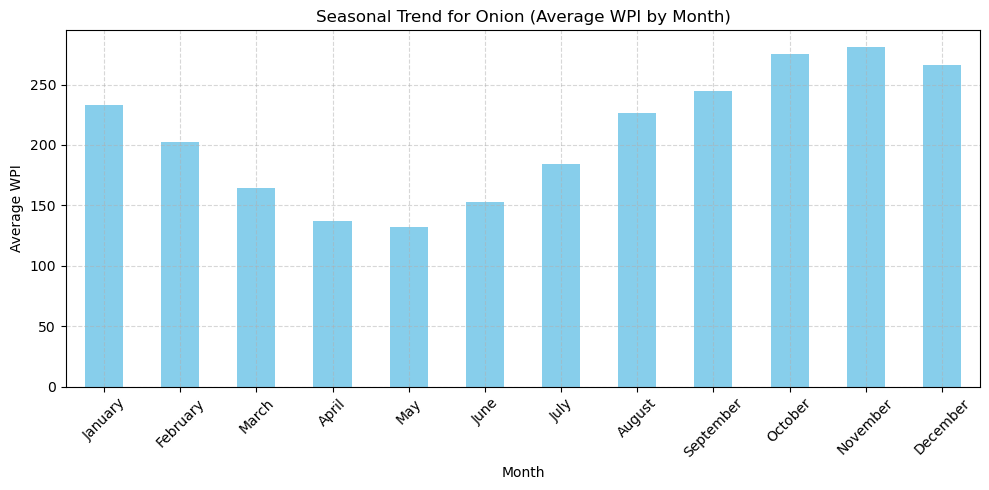

In [32]:
# Full code to check seasonal trend for the Commodities by month

# Detect Seasonal trends(by month)

#Step 1: Pick a Commodity
commodity = 'Onion'
row = df[df['COMM_NAME'] == commodity].iloc[0]

#Step 2: Extract Monthly Columns
index_columns = [col for col in df.columns if col.startswith('INDX')]
wpi_values = row[index_columns].astype(float).reset_index(drop=True)

#Step 3: Create a List of Corresponding Months

# Convert column names like 'INDX042012' to '04' (April)
month_labels = [col[4:6] for col in index_columns]
year_labels = [col[6:] for col in index_columns]
month_names = [pd.to_datetime(m, format='%m').strftime('%B') for m in month_labels]

#Step 4: Create a DataFrame with Month Info
monthly_df = pd.DataFrame({
    'Month': month_names,
    'Year': year_labels,
    'WPI': wpi_values
   
})


# Step 6: Plot Seasonal Trend

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title(f'Seasonal Trend for {commodity} (Average WPI by Month)')
plt.ylabel('Average WPI')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

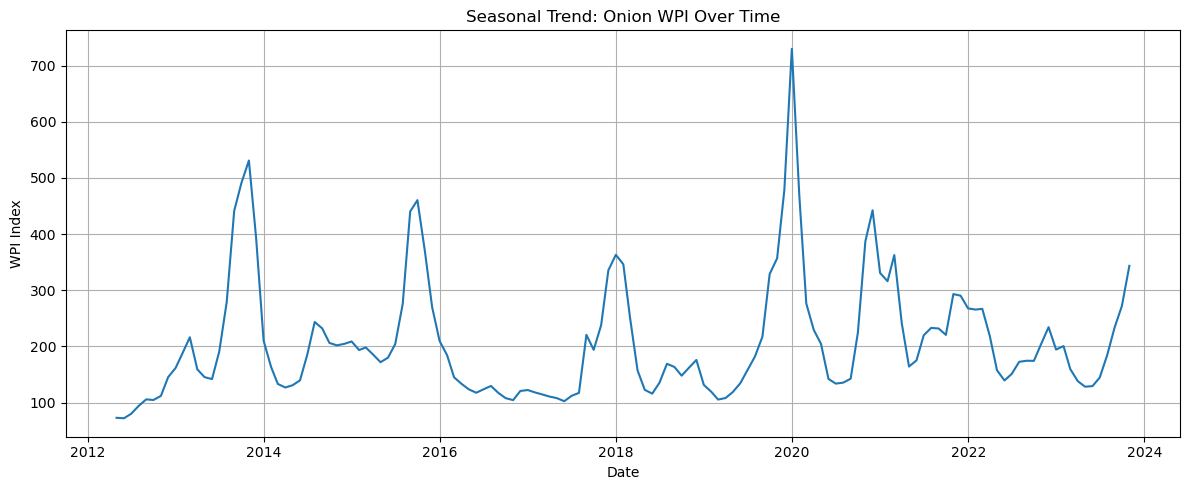

In [33]:
#seasonal trend for the Commodities by Year

commodity = 'Onion'
row = df[df['COMM_NAME'] == commodity].iloc[0]

#2️⃣ Extract the monthly WPI values
index_columns = [col for col in df.columns if col.startswith('INDX')]
monthly_values = row[index_columns].astype(float).reset_index(drop=True)

#3️⃣ Generate a list of dates for the x-axis
import pandas as pd

dates = pd.date_range(start='2012-04-01', periods=len(index_columns), freq='ME')

#4️⃣ Plot the time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(dates, monthly_values)
plt.title(f'Seasonal Trend: {commodity} WPI Over Time')
plt.xlabel('Date')
plt.ylabel('WPI Index')
plt.grid(True)
plt.tight_layout()
plt.show()


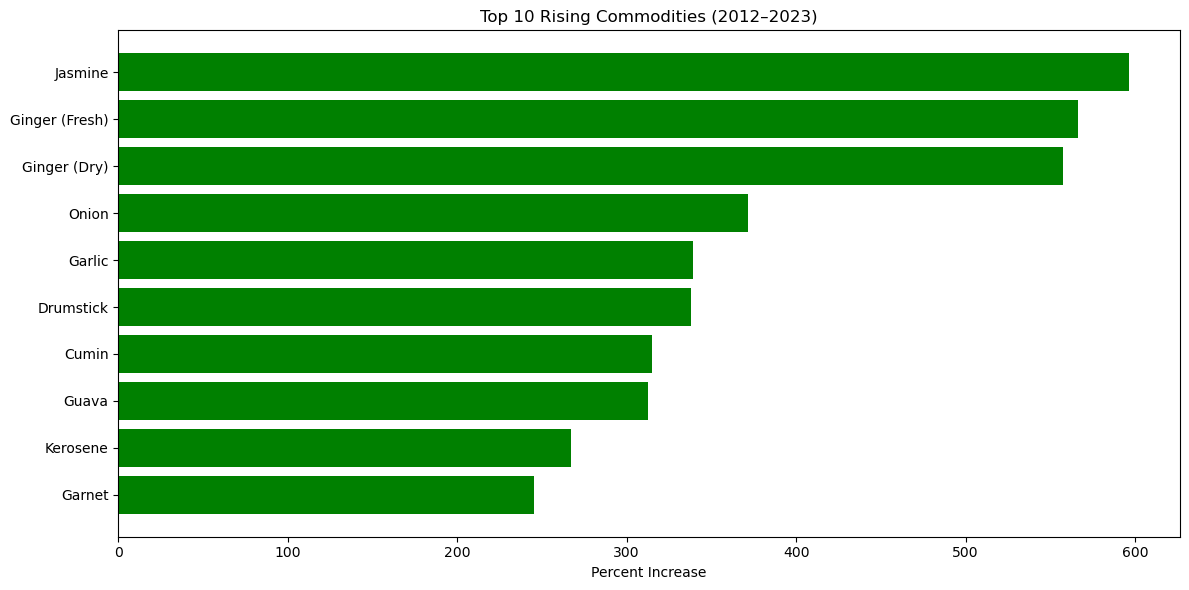

In [34]:
#Top 10 Rising Commodities

top_increase = df.sort_values(by='Percent_Change', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_increase['COMM_NAME'], top_increase['Percent_Change'], color='green')
plt.xlabel('Percent Increase')
plt.title('Top 10 Rising Commodities (2012–2023)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


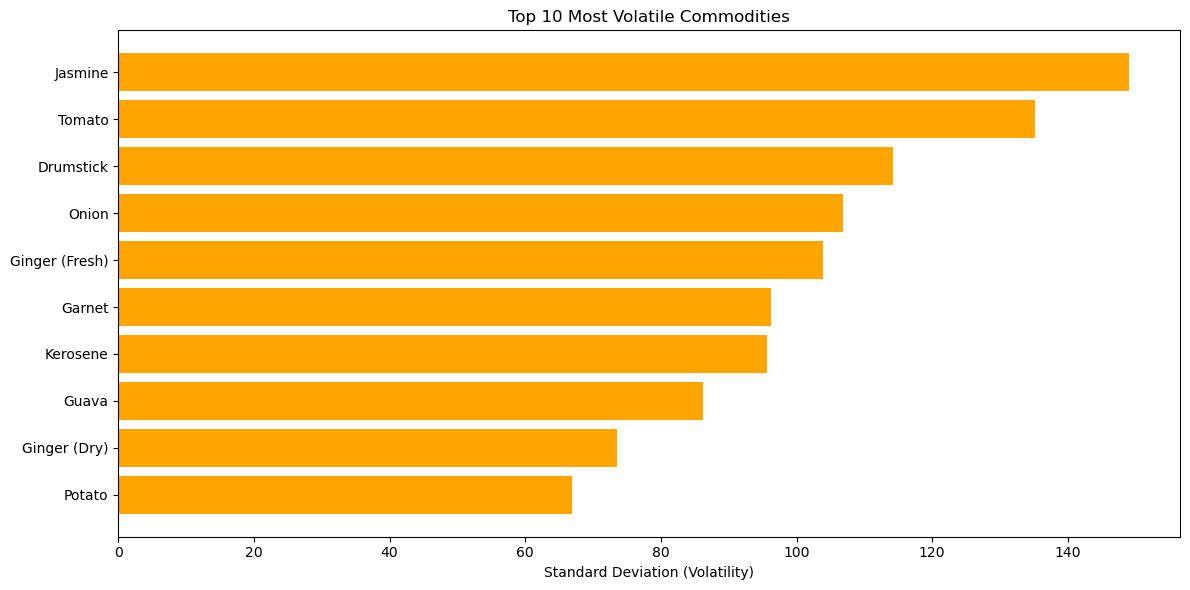

In [35]:
#Bar Chart: Top 10 Volatile Commodities
top_volatility = df.sort_values(by='Volatility', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_volatility['COMM_NAME'], top_volatility['Volatility'], color='orange')
plt.xlabel('Standard Deviation (Volatility)')
plt.title('Top 10 Most Volatile Commodities')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [22]:
df.head(15)


,COMM_NAME,COMM_CODE,COMM_WT,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,...,INDX042023,INDX052023,INDX062023,INDX072023,INDX082023,INDX092023,INDX102023,Absolute_Change,Percent_Change,Volatility
0,Bajra,1101010104,0.08637,107.7,109.3,107.0,113.9,120.7,121.7,114.8,...,229.6,229.4,226.7,226.9,225.9,225.7,231.5,123.8,114.95,32.78
1,Moong,1101010203,0.07088,96.3,96.0,96.6,103.6,108.7,108.4,112.2,...,180.8,178.6,184.8,188.7,189.4,199.7,205.6,109.3,113.50,25.26
2,Masur,1101010204,0.05299,102.5,107.4,109.7,115.2,119.2,119.0,118.6,...,192.1,188.1,187.7,186.6,186.9,192.6,189.5,87.0,84.88,29.55
3,Peas/Chawali,1101010206,0.02444,113.2,123.1,134.3,147.4,143.3,153.8,146.6,...,195.5,199.5,196.0,215.9,219.8,227.4,237.6,124.4,109.89,36.10
4,Cauliflower,1101020108,0.16697,119.1,NaN,NaN,NaN,NaN,134.6,129.4,...,176.9,NaN,NaN,NaN,NaN,230.3,244.6,125.5,105.37,56.01
5,Okra (Lady finger),1101020110,0.14592,152.2,92.6,90.3,87.0,78.0,75.1,89.3,...,212.0,147.0,121.7,177.9,130.6,94.0,123.5,-28.7,-18.86,46.86
6,Beans,1101020118,0.08309,140.4,137.4,138.3,111.2,113.3,90.3,96.5,...,223.3,207.1,225.1,248.2,220.5,172.8,224.5,84.1,59.90,34.38
7,Drumstick,1101020120,0.01823,59.0,59.5,90.9,94.1,74.3,64.8,81.9,...,140.1,142.5,192.7,166.5,138.3,102.7,258.2,199.2,337.63,114.26
8,Orange,1101020204,0.12653,107.9,109.9,112.2,NaN,NaN,NaN,NaN,...,280.5,284.2,293.1,NaN,NaN,NaN,NaN,NaN,NaN,54.29
9,Cashew nut,1101020205,0.06583,90.3,96.1,96.0,99.5,103.5,103.1,101.5,...,154.8,150.4,146.7,145.4,145.7,146.3,147.0,56.7,62.79,25.00


In [50]:
#Seasonal Trends for all Commodities

# Step 1: Identify WPI columns
index_columns = [col for col in df.columns if col.startswith('INDX')]

# Step 2: Extract month names from column names
month_labels = [col[4:6] for col in index_columns]
month_names = [pd.to_datetime(m, format='%m').strftime('%B') for m in month_labels]

# Step 3: Create a master DataFrame
seasonal_data = []

for i, row in df.iterrows():
    commodity = row['COMM_NAME']
    wpi_values = row[index_columns].astype(float).values
    
    temp_df = pd.DataFrame({
        'Commodity': commodity,
        'Month': month_names,
        'Avg_WPI': wpi_values
    })

    # Group same months (e.g., all Aprils from 2012–2023)
    monthly_avg = temp_df.groupby('Month')['Avg_WPI'].mean().reset_index()
    monthly_avg['Commodity'] = commodity
    seasonal_data.append(monthly_avg)

# Step 4: Combine all into one DataFrame
combined_df = pd.concat(seasonal_data, ignore_index=True)

# Step 5: Add month number for sorting
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
combined_df['Month_Num'] = combined_df['Month'].map(month_order)

# Step 6: Reorder columns
combined_df = combined_df[['Commodity', 'Month', 'Month_Num', 'Avg_WPI']]

# Step 7: Export to Excel
combined_df.to_excel("All_Commodities_Seasonal_Trends.xlsx", index=False)


In [48]:
pd.set_option('display.max_row',None)

In [2]:
combined_df.head(100)

NameError: name 'combined_df' is not defined

In [55]:
#Commodity_Monthly_WPI_Trend

# Step 1: Get all index columns (e.g., 'INDX042012', 'INDX052012', ...)
index_columns = [col for col in df.columns if col.startswith('INDX')]

# Step 2: Create a list to collect cleaned rows
records = []

# Step 3: Loop through each commodity
for i, row in df.iterrows():
    comm_name = row['COMM_NAME']
    for col in index_columns:
        value = row[col]
        month = col[4:6]
        year = col[6:]
        month_name = pd.to_datetime(month, format='%m').strftime('%B')
        month_num = int(month)
        
        records.append({
            'Commodity': comm_name,
            'Year': int(year),
            'Month': month_name,
            'Month_Num': month_num,
            'WPI': float(value)
        })

# Step 4: Convert to DataFrame
variance_df = pd.DataFrame(records)

# Step 5: Save to Excel
variance_df.to_excel("Commodity_Monthly_WPI_Trend.xlsx", index=False)


In [54]:
variance_df.head(20)

,Commodity,Year,Month,Month_Num,WPI
0,Bajra,2012,April,4,107.7
1,Bajra,2012,May,5,109.3
2,Bajra,2012,June,6,107.0
3,Bajra,2012,July,7,113.9
4,Bajra,2012,August,8,120.7
5,Bajra,2012,September,9,121.7
6,Bajra,2012,October,10,114.8
7,Bajra,2012,November,11,120.4
8,Bajra,2012,December,12,127.7
9,Bajra,2013,January,1,131.6
